THE SPARKS FOUNDATION - GRIP

DATA SCIENCE AND BUSINESS ANALYTICS

NAME: HARISHMA R

TASK 2:PREDICTION USING UNSUPERVISED ML

LOADING THE LIBRARIES

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings as wg
wg.filterwarnings("ignore")

Load the Iris dataset

In [7]:
file_path = "C:/Users/Harishma/Downloads/Internship/Task 2/Iris.csv"
data = pd.read_csv(file_path)

In [8]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [24]:
data.shape

(150, 7)

In [28]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [30]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Cluster          0
dtype: int64

In [34]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.960000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.818248
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


Finding the optimum of clusters for K-means classification

In [36]:
Iris = pd.DataFrame(data)
Iris_data = Iris.drop(columns = ['Species','Id'])
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [38]:
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters = k)
    km = km.fit(Iris_data)
    within_cluster_sum_of_square.append(km.inertia_)

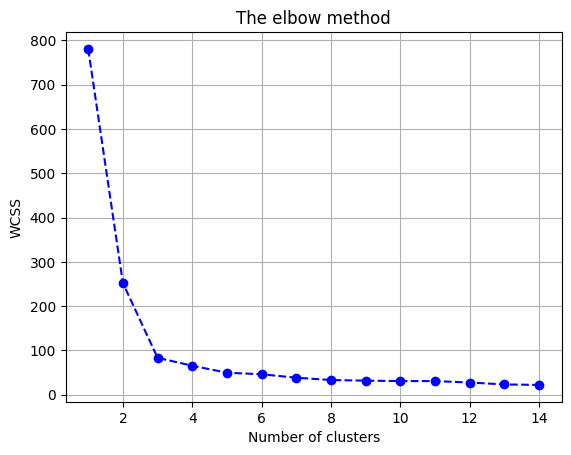

In [43]:
# Plotting the results onto a line graph,
# allowing us to observe 'The elbow'
plt.plot(clusters_range,within_cluster_sum_of_square,'go--',color = 'blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of the squares
plt.grid()
plt.show()

Applying KMeans clustering 

In [45]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(Iris_data)

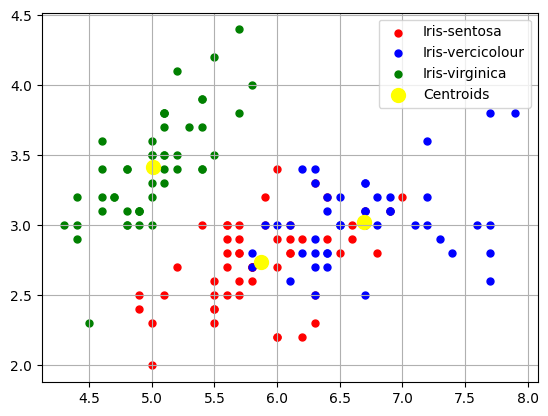

In [47]:
x = Iris_data.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0,0],x[predictions == 0,1],s = 25,c = 'red',label = 'Iris-sentosa')
plt.scatter(x[predictions == 1,0],x[predictions == 1,1],s = 25,c = 'blue',label = 'Iris-vercicolour')
plt.scatter(x[predictions == 2,0],x[predictions == 2,1],s = 25,c = 'green',label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend()
plt.grid()
plt.show()